In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
# loading test data

test = pd.read_csv('test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:
# loading train data

train = pd.read_csv('train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# getting the dimension of data

train.shape, test.shape

((8523, 12), (5681, 11))

In [5]:
# combining both train and test data

df = pd.concat([train,test])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


## EDA

In [8]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#numerical columns: Item_Weight, Item_Visibility, Item_MRP, Outlet_Establisment_Year, Item_Outlet_Sales

''

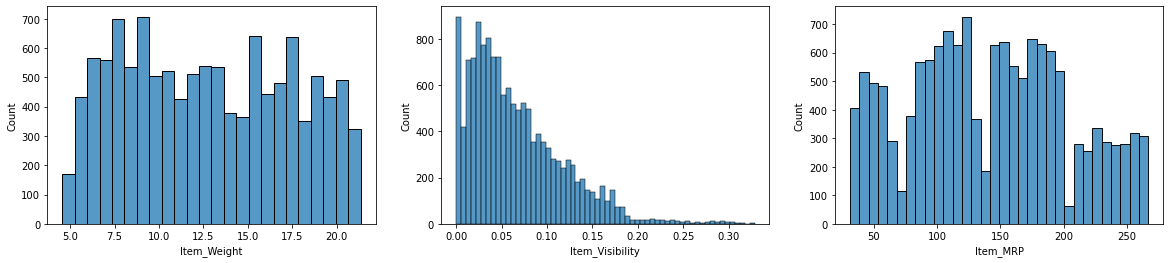

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))
sns.histplot(df['Item_Weight'],ax=ax[0])
sns.histplot(df['Item_Visibility'],ax=ax[1])
sns.histplot(df['Item_MRP'],ax=ax[2])
;

### Observations
* Item_Visibility is right skewed
* No particular pattern can be observed for Item_Weight

## Distribution for Categorical Variables

In [11]:
# Item_Identifier

df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

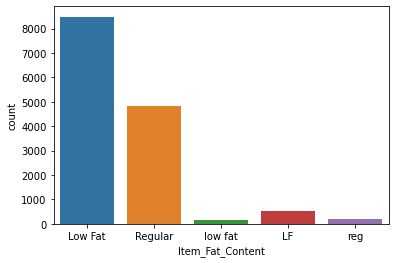

In [12]:
# counts of Item_Fat_Content

sns.countplot(data=df, x="Item_Fat_Content")

In [13]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

* low fat, Low Fat, LF refers to the same Low Fat
* reg, Regular means Regular
* mapping low fat, Low Fat, LF to Low Fat and reg, Regular to Regular

In [14]:
# mapping low fat, Low Fat, LF to Low Fat and reg, Regular to Regular

df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'LF': 'Low Fat', 'low fat': 'Low Fat','Low Fat':'Low Fat',
                                                    'Regular':'Regular','reg':'Regular'})
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'LF': 'Low Fat', 'low fat': 'Low Fat','Low Fat':'Low Fat',
                                                    'Regular':'Regular','reg':'Regular'})
test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'LF': 'Low Fat', 'low fat': 'Low Fat','Low Fat':'Low Fat',
                                                    'Regular':'Regular','reg':'Regular'})

df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

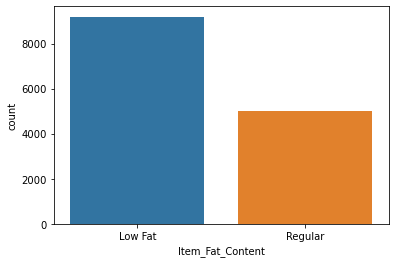

In [15]:
# Distribution of Item_Fat_Content

sns.countplot(data=df, x="Item_Fat_Content")

* Low fat itmes are more

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

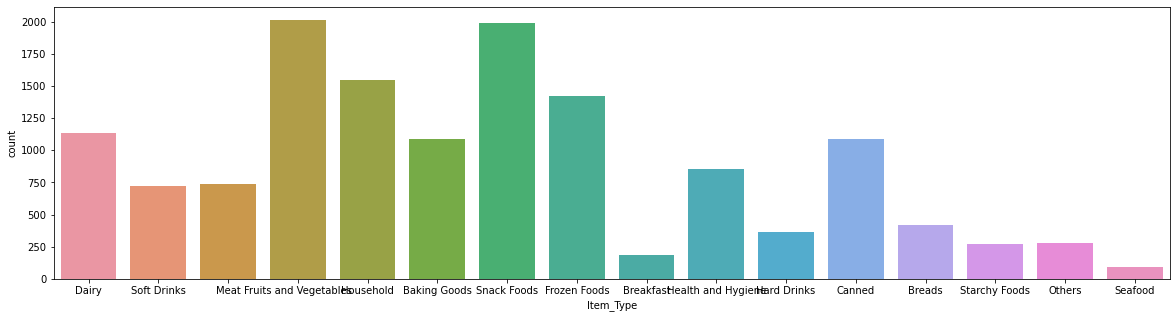

In [16]:
# Distribution of Item_Type

fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data=df, x="Item_Type")

* Most of the items belong Fruits and vegetables and Snack foods category. 
* Seafood category has the least number of items

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

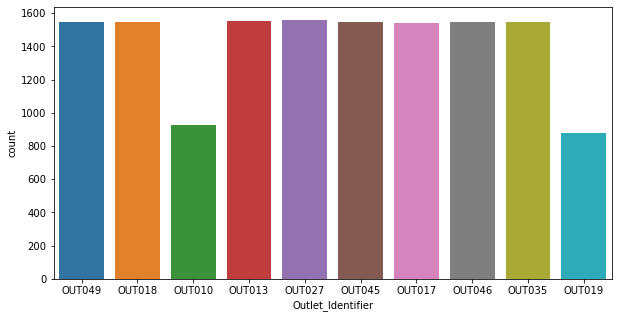

In [17]:
# Distribution of Outlet_Identifier

fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x="Outlet_Identifier")

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

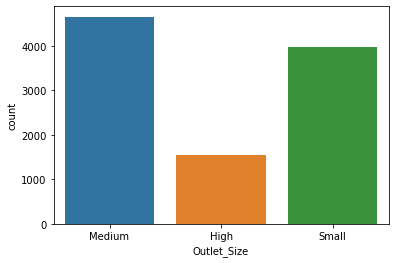

In [18]:
# Distribution of Outlet_Size


sns.countplot(data=df, x="Outlet_Size")

* Medium sized stores have the highest count followed by Small Size
* fewer number of stores with high size

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

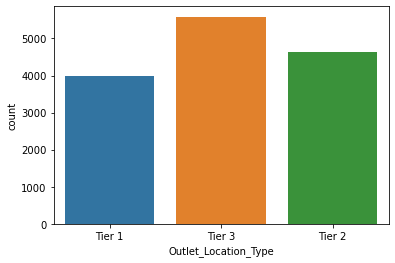

In [19]:
sns.countplot(data=df, x="Outlet_Location_Type")

* Most stores in Tier 3 location followed by Tier 2 and Tier 1

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

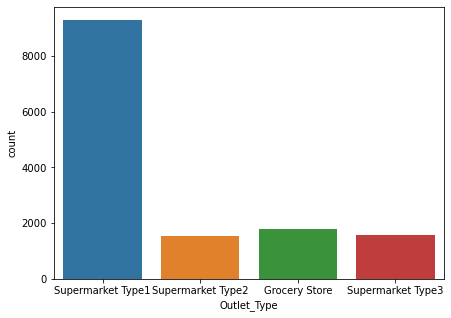

In [20]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(data=df, x="Outlet_Type")

* Most of the outlets are of Supermarket Type1 followed by Grocery Store
* Almost similar count for Supermarket Type2 and Supermarket Type3 

## Bivariate Analysis

''

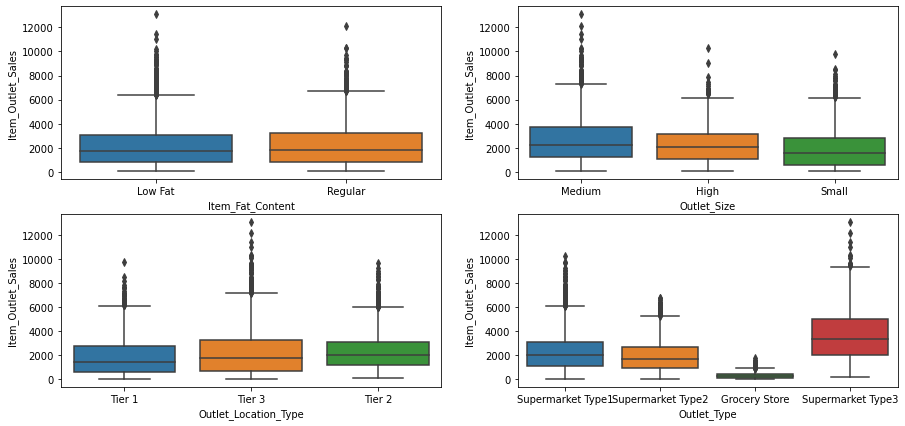

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(15,7))
sns.boxplot(ax=ax[0,0],x="Item_Fat_Content",y='Item_Outlet_Sales',data=train)
sns.boxplot(ax=ax[0,1],x="Outlet_Size",y='Item_Outlet_Sales',data=train)
sns.boxplot(ax=ax[1,0],x="Outlet_Location_Type",y='Item_Outlet_Sales',data=train)
sns.boxplot(ax=ax[1,1],x="Outlet_Type",y='Item_Outlet_Sales',data=train)
;

## Observations
* For Item_Fat_Content, outlet sales are almost similar, but outliers are present
* For Outlet_Size, median sales is almost same for Medium and High outlet size, 
  however the median outlet sales is lower for small outlet
* Tier 2 and Tier 3 sales are almost similar. Tier 1 sales falls behind other tiers
* Medain sales is higher for Supermarket Type3 
* Grocery Store sales is low in comparison to other store type
* Eventhough most outlet belongs to supermarket type1, sales is lower than that of type3 supermarket
* We can't establish a relationship between store type and sales
* Outliers are present

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

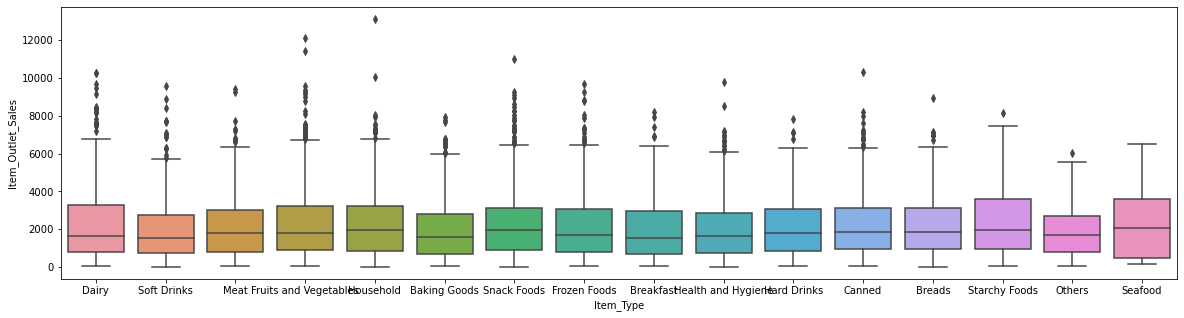

In [22]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x="Item_Type",y='Item_Outlet_Sales',data=train)

* Eventhough seafood category had the least items, sales is amongst the top for seafood category
* Median sales remains almost similar for all categories

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

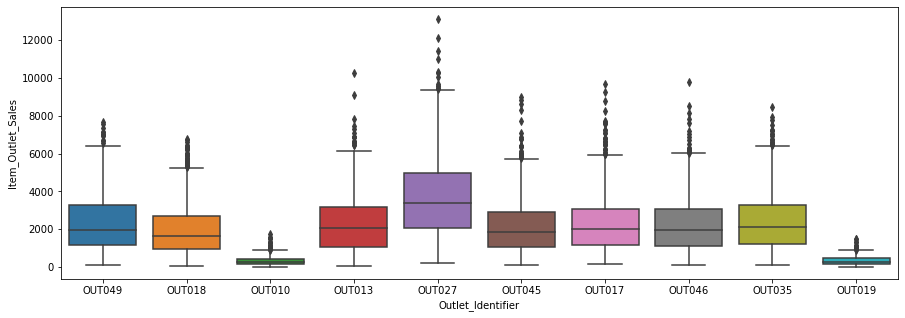

In [23]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x="Outlet_Identifier",y='Item_Outlet_Sales',data=train)

* Outlet010 and Outlet019 which had the lowest numbers have registered lower sales
* Average sales in other outlets remains almost the same except for OUT027 which has the highest sales

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

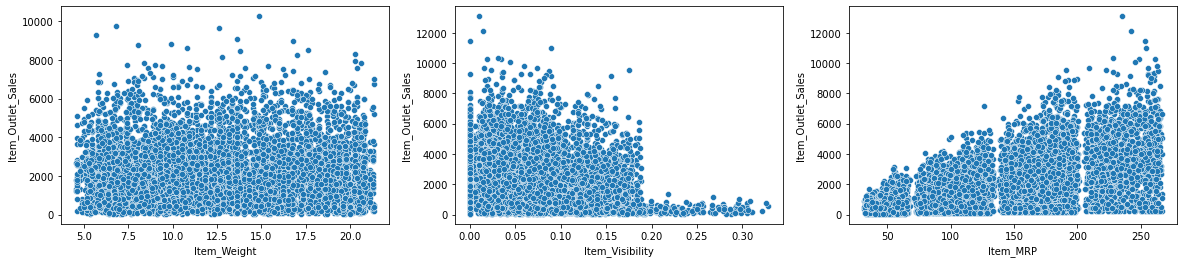

In [24]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
sns.scatterplot(data=train, x='Item_Weight', y='Item_Outlet_Sales', ax=ax[0])
sns.scatterplot(data=train, x='Item_Visibility', y='Item_Outlet_Sales', ax=ax[1])
sns.scatterplot(data=train, x='Item_MRP', y='Item_Outlet_Sales', ax=ax[2])

* No particular pattern can be observed from item_weight vs item_outlet_sales
* As item_visibility increases, the item_outlet_sales is decreasing
* As item_mrp increases, item_outlet_sales also increases. We can see a linear trend here. 
  We can also observe 4 segments of MRP

## Treating Missing Values

* We have missing values in two columns, Item_Weight and Outlet_Size
* Item_Weight being numerical, we will impute the missing values with mean value 
* Outlet_Size is categorical, we will impute those missing values with mode

In [25]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [26]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [27]:
train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

## Feature Engineering

### Modifying Item_Visibility

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

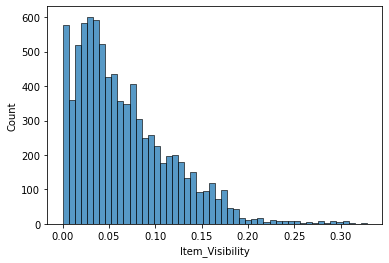

In [28]:
sns.histplot(train['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

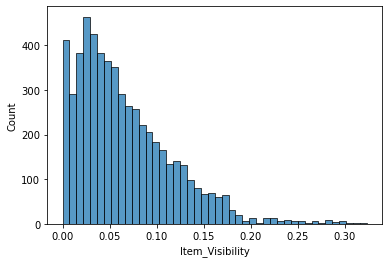

In [29]:
sns.histplot(test['Item_Visibility'])

In [30]:
# replacing zero visibility in train data with mean for corresponding item_identifier
train.loc[train[(train['Item_Visibility']==0)].index,'Item_Visibility'] = train.loc[train[(train['Item_Visibility']==0)].index,
                                                                        'Item_Identifier'].apply(lambda x: train.groupby('Item_Identifier')['Item_Visibility'].mean()[x])

# replacing zero visibility in test data with mean for corresponding item_identifier
test.loc[test[(test['Item_Visibility']==0)].index,'Item_Visibility'] = test.loc[test[(test['Item_Visibility']==0)].index,
                                                                        'Item_Identifier'].apply(lambda x: test.groupby('Item_Identifier')['Item_Visibility'].mean()[x])

### Creating Item_Id based on Item_Identifier

In [31]:
# extract first 2 characters from Item_Identifier
df['Item_Id'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [32]:
df['Item_Id'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Id, dtype: int64

In [33]:
df[['Item_Id','Item_Type']]

,Item_Id,Item_Type
0,FD,Dairy
1,DR,Soft Drinks
2,FD,Meat
3,FD,Fruits and Vegetables
4,NC,Household
...,...,...
5676,FD,Snack Foods
5677,FD,Starchy Foods
5678,NC,Health and Hygiene
5679,FD,Canned


* It can be observed that FD, DR and NC can be referred as food, drinks and non-consumables after 
  checking with item type

In [34]:
# extract first 2 characters from Item_Identifier
train['Item_Id'] = train['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Id'] = test['Item_Identifier'].apply(lambda x: x[0:2])

# renaming FD,DR, NC as Food, Drink, Non-Consumbles

train['Item_Id'] = train['Item_Id'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
test['Item_Id'] = test['Item_Id'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [35]:
# replacing Item_Fat_content for non-consumables as Non-Ebible
train.loc[train['Item_Id']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
test.loc[test['Item_Id']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"

In [36]:
train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Id                    8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

In [38]:
#label encoding outlet_identifier to create a new columns outlet
le = LabelEncoder()
# creating outlet
train['Outlet'] = le.fit_transform(train['Outlet_Identifier'])
test['Outlet'] = le.fit_transform(test['Outlet_Identifier'])

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Id                    8523 non-null   object 
 13  Outlet                     8523 non-null   int64

In [40]:
# converting categorical to numerical using one hot encoding

train = pd.get_dummies(train,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type',
                                     'Item_Id','Outlet'],dtype=float,drop_first=True)

test = pd.get_dummies(test,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type',
                                     'Item_Id','Outlet'],dtype=float,drop_first=True)

In [41]:
train.drop('Item_Type',axis=1,inplace=True)
test.drop('Item_Type',axis=1,inplace=True)

## Model Building

### Base Model

In [42]:
mean_sales = train['Item_Outlet_Sales'].mean()

base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

base1.to_csv("alg0.csv",index=False)

/var/folders/_f/yddvl3kn7472_z0qzhty3g8h0000gn/T/ipykernel_7399/3276851287.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base1['Item_Outlet_Sales'] = mean_sales


### Splitting the data into X and y

In [43]:
train1 = train.drop(['Item_Identifier','Outlet_Identifier'], axis=1)
test1 = test.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

In [44]:
X_train = train1.drop(['Item_Outlet_Sales'], axis=1)
X_test = test1
y_train = train1.Item_Outlet_Sales

### Scaling the data

In [45]:
# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)


## Linear Regression Model

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([1842.12119647, 1571.38300837, 1874.96643559, ..., 1811.44275069,
       3537.09403415, 1268.93935069])

In [47]:
r2_score(y_train, lr.predict(X_train))

0.5634705721788253

In [48]:
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))

RMSE : 1127


In [49]:
cv_results = cross_val_score(lr,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
-cv_results.mean()

1276666.1864118655

In [50]:
lin_reg = pd.DataFrame({'Item_Identifier':test['Item_Identifier'], 
                        'Outlet_Identifier':test['Outlet_Identifier'],
                        'Item_Outlet_Sales': y_pred_lr},
                       columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])


In [51]:
lin_reg.to_csv('lr.csv',index=False)

In [53]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

In [62]:
dt = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [63]:
cv_results = cross_val_score(dt,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
-cv_results.mean()

1378139.3512121118

In [64]:
(-cv_results.mean())**(1/2)

1173.941800606875

In [65]:
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train, dt.predict(X_train))))

RMSE : 1099


In [66]:
dtree = pd.DataFrame({'Item_Identifier':test['Item_Identifier'], 
                        'Outlet_Identifier':test['Outlet_Identifier'],
                        'Item_Outlet_Sales': y_pred_dt},
                       columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
dtree.to_csv('dtree.csv',index=False)

In [67]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
rf.fit(X_train, y_train)
y_pred_rf = dt.predict(X_test)

In [69]:
cv_results = cross_val_score(rf, X_train, y_train, cv = 5, scoring="neg_mean_squared_error")
-cv_results.mean()

1165694.7433176623

In [70]:
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))

RMSE : 1057


In [71]:
rf = pd.DataFrame({'Item_Identifier':test['Item_Identifier'], 
                        'Outlet_Identifier':test['Outlet_Identifier'],
                        'Item_Outlet_Sales': y_pred_dt},
                       columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
rf.to_csv('rf.csv',index=False)

## reference
* https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/
* https://github.com/shrikant-temburwar/Big-Mart-Sales-Prediction/blob/master/BigMartSales.ipynb